## **필요한 라이브러리 import**

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#신용카드 채무 불이행 데이터
df = pd.read_csv("https://coplit-next-jupyter-blobs.s3.ap-northeast-2.amazonaws.com/credit_card_default.csv")

## **기본 전처리**

In [84]:
"""
- 1: 기혼
- 2: 미혼
- 3: 기타

NOTE:
- 0: 데이터셋 소개에 언급되지 않은 카테고리
- 마찬가지로 개수가 적으니 분석시 제외하는 것을 고려 할 수 있음
"""

df.MARRIAGE.value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [85]:
# MARRIAGE가 0인 케이스 선택
idxs = df.MARRIAGE.isin([0])
idxs

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: MARRIAGE, Length: 30000, dtype: bool

In [86]:
# marriage가 0이 아닌 케이스만 선택
df = df[~idxs]

In [87]:
df.MARRIAGE.value_counts().sort_index()

MARRIAGE
1    13659
2    15964
3      323
Name: count, dtype: int64

In [88]:
"""
- 1 = 대학원 졸업
- 2 = 대학교 졸업
- 3 = 고등학교 졸업
- 4 = 기타

NOTE:
- 0, 5, 6: 데이터셋 소개에 언급되지 않은 카테고리
- 개수가 적으니 분석시 제외하는 것을 고려 할 수 있음
"""

df.EDUCATION.value_counts().sort_index()

EDUCATION
0       14
1    10581
2    14024
3     4873
4      123
5      280
6       51
Name: count, dtype: int64

In [89]:
# EDUCATION 0, 5, 6이 아닌 케이스만 선택
idxs = df.EDUCATION.isin([0, 5, 6])
df = df[~idxs]

In [90]:
df.EDUCATION.value_counts().sort_index()

EDUCATION
1    10581
2    14024
3     4873
4      123
Name: count, dtype: int64

In [91]:
# 인덱스 초기화 (0 ~ 전체 데이터수 -1)
df = df.reset_index(drop=True)

In [92]:
df.index

RangeIndex(start=0, stop=29601, step=1)

In [93]:
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY1,PAY2,PAY3,PAY4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [94]:
"""
수치로 된 데이터 문자열로 변경
"""

df["GENDER"] = df.GENDER.replace({1: "Male", 2: "Female"})
df["MARRIAGE"] = df.MARRIAGE.replace({1: "Married", 2: "Single", 3: "Others"})
df["EDUCATION"] = df.EDUCATION.replace({1: "Graduate School", 2: "University", 3: "High School", 4: "Others"})
df["DEFAULT"] = df.DEFAULT.replace({0: "Non-Default", 1: "Default"})

In [95]:
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY1,PAY2,PAY3,PAY4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Default
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Default
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Non-Default
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Non-Default
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Non-Default


In [96]:
df.GENDER.unique()

array(['Female', 'Male'], dtype=object)

## **matplotlib를 활용한 시각화**

### 일변량 시각화

#### **Bar chart: 채무 불이행 빈도**

In [97]:
cnts = df.DEFAULT.value_counts().sort_index().to_frame("Frequency").reset_index()
# df.DEFAULT.value_counts(): DEFAULT 컬럼에 있는 값(예: 0, 1 등)의 개수를 세어 Series로 반환 
# to_frame("Frequency") Series를 DataFrame으로 바꾸면서 컬럼명을 "Frequency"로 지정
cnts

,DEFAULT,Frequency
0,Default,6605
1,Non-Default,22996


<BarContainer object of 2 artists>

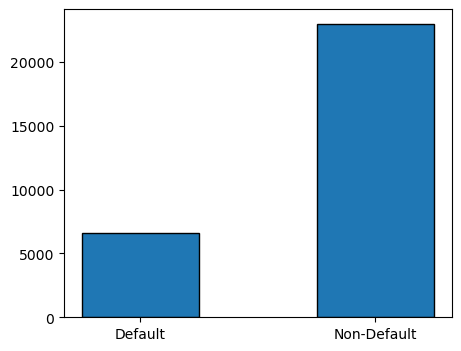

In [98]:
x = range(len(cnts.DEFAULT))
y = cnts.Frequency
xlabels = cnts.DEFAULT

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.bar(x, y, width=0.5, edgecolor="black", tick_label=xlabels)

#### **파이차트: 학력의 비율**

In [99]:
cnts = df.groupby("EDUCATION").size().sort_values(ascending=False).to_frame("Frequency").reset_index()
cnts

,EDUCATION,Frequency
0,University,14024
1,Graduate School,10581
2,High School,4873
3,Others,123


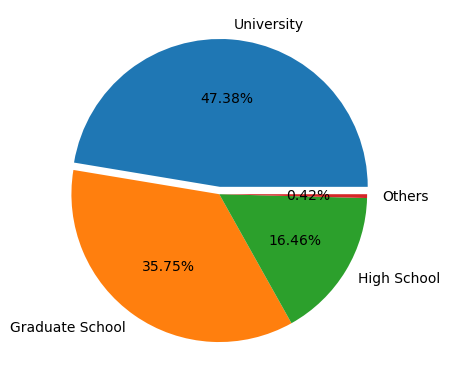

In [100]:
fig, ax = plt.subplots(1, 1)
# labels: 범주 표기, autopct: 비율 표기 (digit=2), 
# radius: 차트 크기를 조정, explode: 강조하고 싶은 범주를 떼어낼 때 사용
_ = ax.pie(
    cnts.Frequency, labels=cnts.EDUCATION, autopct="%.2f%%",
    radius=1.0, explode=[0.05, 0, 0, 0]
)

#### **히스토그램: 신용도의 분포**

In [101]:
df[["LIMIT_BAL"]].head()

,LIMIT_BAL
0,20000
1,120000
2,90000
3,50000
4,50000


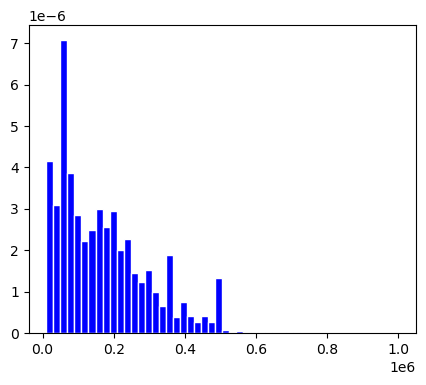

In [102]:
fig, ax = plt.subplots(figsize=(5, 4))
_ = ax.hist(df.LIMIT_BAL, bins=50, density=True, color="blue", edgecolor="white")

#### **산점도: 지난달 청구 금액과 5개월 전 청구 금액**

Text(0, 0.5, 'BILL_AMT6')

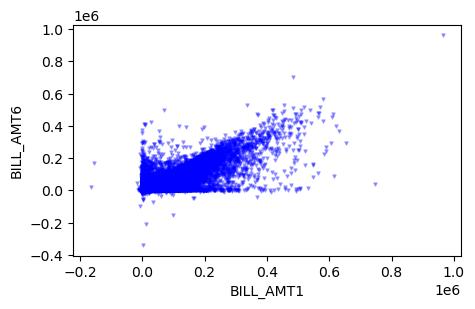

In [103]:
# 지난달 카드 청구 금액 / 5개월 전 카드 청구 금액
x_col, y_col = "BILL_AMT1", "BILL_AMT6"
x, y = df[x_col], df[y_col]

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, y, s=5, color="b", alpha=0.3, marker="v")
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)

### **다변량 시각화**

#### **Bar Chart: 성별에 따른 채무 불이행 빈도**

In [104]:
# 성별에 따라 채무 불이행 계산
cnts = (
    df
    .groupby("GENDER")
    .DEFAULT
    .value_counts()
    .to_frame("Frequency")
    .reset_index()
)
cnts

,GENDER,DEFAULT,Frequency
0,Female,Non-Default,14111
1,Female,Default,3744
2,Male,Non-Default,8885
3,Male,Default,2861


[Text(0.15, 0, 'Non-Default'), Text(1.15, 0, 'Default')]

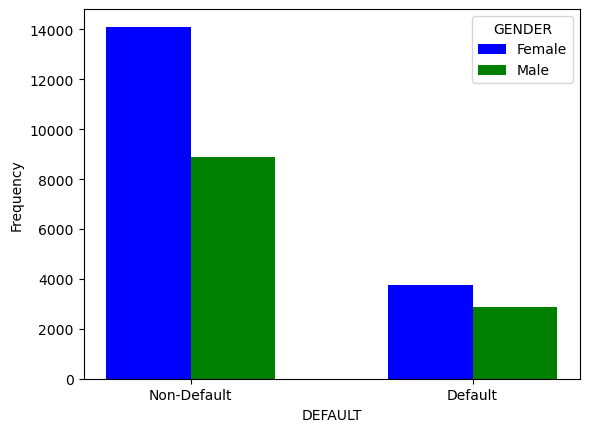

In [105]:
labels = ["Female", "Male"]
colors = ["Blue", "Green"]
bar_width = 0.3

fig, ax = plt.subplots(1, 1)
x = range(len(cnts.DEFAULT.unique()))
for i, lb in enumerate(labels):
    # 현재 성별 선택
    cur = cnts.query(f"GENDER == '{lb}'")
    
    # 현재 성별에 대한 x축 위치: 다음 label에 대해 x축 눈금 일정 간격 이동
    cur_x = [val + bar_width*i for val in x]
    y = cur.Frequency
    ax.bar(cur_x, y, width=bar_width, label=lb, color=colors[i])

ax.legend(title="GENDER")
ax.set_xlabel("DEFAULT")
ax.set_ylabel("Frequency")

# 성별에 따라 첫 카테고리 x축 위치와 마지막 카테고리 x축 위치의 중심을 x축 눈금으로 설정
xticks_pos = [
    (
        val +
        val + bar_width*(len(labels)-1)
    ) / 2
    for val in x
]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(["Non-Default", "Default"])

#### **Bar Chart: 학력에 따른 채무 불이행 빈도**

In [106]:
# 성별에 따라 채무 불이행 계산
cnts = (
    df
    .groupby("EDUCATION")
    .DEFAULT
    .value_counts()
    .to_frame("Frequency")
    .reset_index()
)
cnts

,EDUCATION,DEFAULT,Frequency
0,Graduate School,Non-Default,8545
1,Graduate School,Default,2036
2,High School,Non-Default,3640
3,High School,Default,1233
4,Others,Non-Default,116
5,Others,Default,7
6,University,Non-Default,10695
7,University,Default,3329


[Text(0.30000000000000004, 0, 'Non-Default'), Text(1.3, 0, 'Default')]

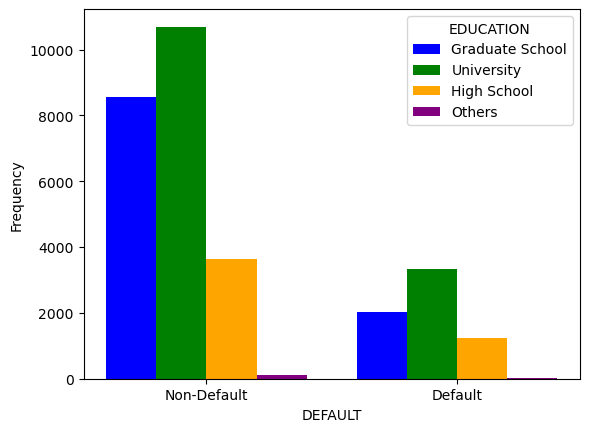

In [107]:
labels = ["Graduate School", "University", "High School", "Others"]
colors = ["Blue", "Green", "Orange", "Purple"]
bar_width = 0.2

fig, ax = plt.subplots(1, 1)
x = range(len(cnts.DEFAULT.unique()))
# x = [0] + [i*(len(labels)+1)*bar_width for i in range(1, len(cnts.DEFAULT.unique()))]
for i, lb in enumerate(labels):
    # 현재 성별 선택
    cur = cnts.query(f"EDUCATION == '{lb}'")
    
    # 현재 성별에 대한 x축 위치: 다음 label에 대해 x축 눈금 일정 간격 이동
    cur_x = [val + bar_width*i for val in x]
    y = cur.Frequency
    ax.bar(cur_x, y, width=bar_width, label=lb, color=colors[i])

ax.legend(title="EDUCATION")
ax.set_xlabel("DEFAULT")
ax.set_ylabel("Frequency")

# 성별에 따라 첫 카테고리 x축 위치와 마지막 카테고리 x축 위치의 중심을 x축 눈금으로 설정
xticks_pos = [
    (
        val +
        val + bar_width*(len(labels)-1)
    ) / 2
    for val in x
]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(["Non-Default", "Default"])

#### **산점도: 채부 불이행을 구분했을 때 지난달 청구 금액과 5개월 전 청구 금액**

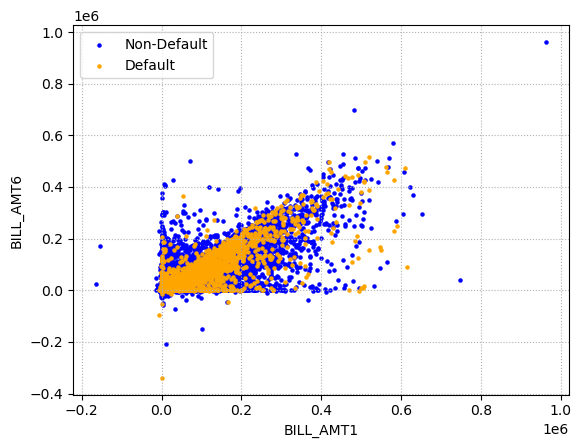

In [108]:
# 지난달 카드 청구 금액
x_col = "BILL_AMT1"
# 5개월 전 카드 청구 금액
y_col = "BILL_AMT6"


labels = ["Non-Default", "Default"]
colors = ["blue", "orange"]

fig, ax = plt.subplots(1, 1)
for i, lb in enumerate(labels):
    cur = df.query(f"DEFAULT == '{lb}'")

    x = cur[x_col]
    y = cur[y_col]

    ax.scatter(x, y, s=5, color=colors[i], label=lb)

ax.grid(linestyle=":")
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.legend()

## **seaborn을 활용한 시각화**

### **다변량 시각화**

#### **Bar Chart: 성별에 따른 채무 불이행 빈도**

In [109]:
# 성별에 따른 채무 불이행 빈도 계산
cnts = (
    df
    .groupby("GENDER")
    .DEFAULT
    .value_counts()
    .to_frame("Frequency")
    .reset_index()
)
cnts

,GENDER,DEFAULT,Frequency
0,Female,Non-Default,14111
1,Female,Default,3744
2,Male,Non-Default,8885
3,Male,Default,2861


<Axes: xlabel='DEFAULT', ylabel='Frequency'>

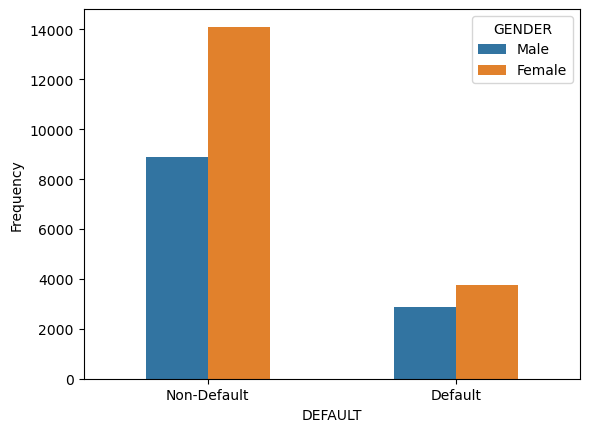

In [110]:
sns.barplot(
    cnts,
    x="DEFAULT",  # x축: 범주
    y="Frequency",  # y축: 빈도
    hue="GENDER",  # 그룹: 성별,
    order=["Non-Default", "Default"],  # x축 범주 순서
    hue_order=["Male", "Female"],  # 그룹 범주 순서
    width=0.5,  # bar 두께
)

#### **히트맵: 수치형 변수들의 상관계수**

In [111]:
# 연속형 데이터의 상관관계
bill_amt_cols = [f"BILL_AMT{i}" for i in range(1, 7)]
# pay_amt_cols = [f"PAY_AMT{i}" for i in range(1, 7)]
numeric_cols = ["LIMIT_BAL", "AGE"] + bill_amt_cols

corr_mat = df[numeric_cols].corr()
corr_mat.round(2)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
LIMIT_BAL,1.00,0.14,0.28,0.28,0.28,0.29,0.30,0.29
AGE,0.14,1.00,0.05,0.05,0.05,0.05,0.05,0.05
BILL_AMT1,0.28,0.05,1.00,0.95,0.89,0.86,0.83,0.80
BILL_AMT2,0.28,0.05,0.95,1.00,0.93,0.89,0.86,0.83
BILL_AMT3,0.28,0.05,0.89,0.93,1.00,0.93,0.89,0.86
BILL_AMT4,0.29,0.05,0.86,0.89,0.93,1.00,0.94,0.90
BILL_AMT5,0.30,0.05,0.83,0.86,0.89,0.94,1.00,0.95
BILL_AMT6,0.29,0.05,0.80,0.83,0.86,0.90,0.95,1.00


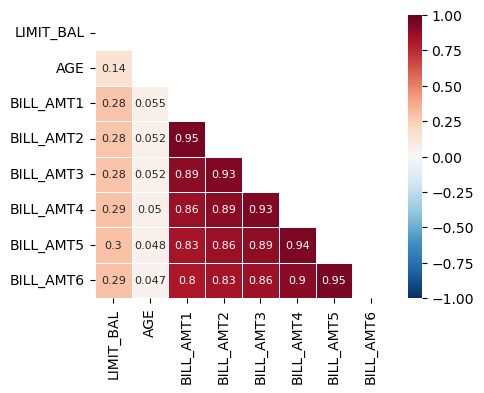

In [112]:
# 상관계수 행렬은 대칭이고 대각선이 항상 1이니까 해당 부분은 시각화에서 제외
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

ax = sns.heatmap(
    corr_mat,
    mask=mask,
    cmap="RdBu_r",  # 색상맵 지정
    vmin=-1.0,  # colormap의 최솟값    
    vmax=1.0,  # colormap의 최댓값    
    linewidths=0.5,  # 경계선 두께,
    annot=True,  # 상관관계 수치 표기,
    annot_kws={"fontsize": 8},  # annotation 폰트사이즈
)
ax.figure.subplots_adjust(right=0.7, top=0.7)  # 차트 사이즈 조정

#### **바이올린 플랏: (채무 불이행, 학력)에 따른 신용 한도의 분포**

In [113]:
df[["DEFAULT", "EDUCATION", "LIMIT_BAL"]].head()

,DEFAULT,EDUCATION,LIMIT_BAL
0,Default,University,20000
1,Default,University,120000
2,Non-Default,University,90000
3,Non-Default,University,50000
4,Non-Default,University,50000


<Axes: xlabel='DEFAULT', ylabel='LIMIT_BAL'>

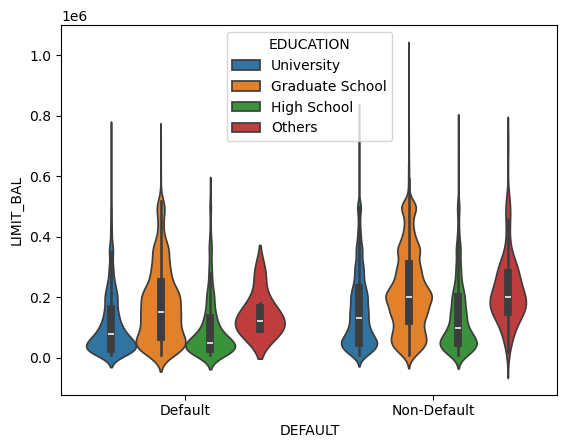

In [114]:
sns.violinplot(
    data=df,
    x="DEFAULT",  # x축: 범주
    y="LIMIT_BAL",  # y축: 분포를 시각화 하려는 변수 (신용도)
    hue="EDUCATION"  # 그룹: 학력
)